In [3]:
from ugi_rxn_mapper import ugi_rxn_mapper

from chemprop.train import make_predictions, load_model
from chemprop.args import PredictArgs


In [2]:
smi = 'C#CCCC(=O)NC(C(=O)NC(C)(C)C)C1=CC=CC=C1F'
rxn_smi = ugi_rxn_mapper([smi])[0]
rxn_smi = [[rxn_smi,"FC(F)(F)CO"]]
print(rxn_smi)


[['[#6-:9]#[#7+:11]-[#6:12](-[#6H3:13])(-[#6H3:14])-[#6H3:15].[#7H3].[#6H:8](=[#8])-[#6:16]1:[#6H:17]:[#6H:18]:[#6H:19]:[#6H:20]:[#6:21]:1-[#9:22].[#6:5](=[#8:6])(-[#8H:10])-[#6H2:4]-[#6H2:3]-[#6:2]#[#6H:1]>>[#6H:1]#[#6:2]-[#6H2:3]-[#6H2:4]-[#6:5](=[#8:6])-[#7H:7]-[#6H:8](-[#6:9](=[#8:10])-[#7H:11]-[#6:12](-[#6H3:13])(-[#6H3:14])-[#6H3:15])-[#6:16]1:[#6H:17]:[#6H:18]:[#6H:19]:[#6H:20]:[#6:21]:1-[#9:22]', 'FC(F)(F)CO']]


In [3]:

args = PredictArgs()
args.features_generator =  ["rdkit_2d","ifg_drugbank_2","ugi_qmdesc_atom"]
args.number_of_molecules = 2
args.gpu = 0
# args.checkpoint_dir = '/home/jnliu/chemprop/benchmark_chemprop/yield_pred/all_data/rdkit_ifg2_qmatom_hyper_opted_no_test/'

# args.checkpoint_paths = ['../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_2/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_1/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_8/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_6/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_0/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_4/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_9/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_7/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_3/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_5/model_0/model.pt']
# args.checkpoint_paths = ['/home/jnliu/chemprop/benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_2/model_0/model.pt']
args.checkpoint_paths = ["/home/jnliu/chemprop/benchmark_chemprop/yield_pred/all_data/rdkit_ifg2_qmatom_hyper_opted_no_test/fold_2/model_0/model.pt",]
args.no_features_scaling = False
args.preds_path = "./preds.csv"
mpnn_model = load_model(args=args)


Loading training args
Loading pretrained parameter "encoder.encoder.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.W_h.weight".
Loading pretrained parameter "encoder.encoder.W_o.bias".
Loading pretrained parameter "encoder.encoder_solvent.cached_zero_vector".
Loading pretrained parameter "encoder.encoder_solvent.W_i.weight".
Loading pretrained parameter "encoder.encoder_solvent.W_h.weight".
Loading pretrained parameter "encoder.encoder_solvent.W_o.weight".
Loading pretrained parameter "encoder.encoder_solvent.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "readout.7.weight".
Loading pretrained parameter "readout.7.bias".
Moving model to cuda


In [ ]:

try:
    preds_result = make_predictions(args, smiles=rxn_smi, model_objects=mpnn_model)
except:
    mpnn_model = load_model(args=args)
    preds_result = make_predictions(args, smiles=rxn_smi, model_objects=mpnn_model)
preds_result[0][0]

In [1]:
from qmdesc import ReactivityDescriptorHandler
handler = ReactivityDescriptorHandler()

def cal(smi):
    return handler.predict(smi)
    

In [1]:
from rdkit import Chem

Chem.MolToInchiKey(Chem.MolFromSmiles('CCOc1ccc(Cn2cc(-c3ccc(N(C(C)=O)C(C(=O)NC(C)(C)C)c4c(C)cc(F)cc4C)cc3)nn2)cc1')) 

'CFAOIQQDGOAAIO-UHFFFAOYSA-N'

In [4]:

args = PredictArgs()
args.features_generator =  ["scaffoldkeys", "cats2d", "ifp3_7en8"]
args.gpu = 0
# args.checkpoint_dir = '/home/jnliu/chemprop/benchmark_chemprop/yield_pred/all_data/rdkit_ifg2_qmatom_hyper_opted_no_test/'

# args.checkpoint_paths = ['../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_2/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_1/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_8/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_6/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_0/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_4/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_9/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_7/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_3/model_0/model.pt', '../benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_5/model_0/model.pt']
# args.checkpoint_paths = ['/home/jnliu/chemprop/benchmark_chemprop/hyper_opt/opt_for_pred/trial_seed_60/fold_2/model_0/model.pt']
# args.checkpoint_paths = ["/home/jnliu/chemprop/benchmark_chemprop/yield_pred/all_data/rdkit_ifg2_qmatom_hyper_opted_no_test/fold_2/model_0/model.pt",]
args.checkpoint_paths = [
            "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_0/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_0/model_1/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_0/model_2/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_1/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_1/model_1/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_1/model_2/model.pt",
            
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_2/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_3/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_4/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_5/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_6/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_7/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_8/model_0/model.pt",
            # "/home/zxhuang/modular_click/machine_learning/chemprop_project_rescreen/opted_results/doc_1_2_3/scaffoldkeys_cats2d_ifp3_7en8_qmdesc/scaffold_balanced_noTest/fold_9/model_0/model.pt",
        ]
args.no_features_scaling = False
args.preds_path = "./preds.csv"
args.cal_qmdesc = True
mpnn_model = load_model(args=args)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Moving model to cuda


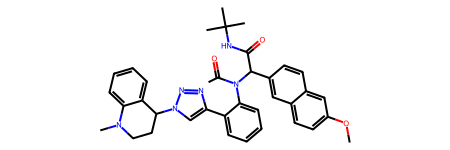

In [9]:
smiles = 'COc1ccc2cc(C(C(=O)NC(C)(C)C)N(C(C)=O)c3ccccc3-c3cn(C4CCN(C)c5ccccc54)nn3)ccc2c1'
# preds_result = make_predictions(args, smiles=[smiles], model_objects=mpnn_model)

# preds_result[0][0]
mol = Chem.MolFromSmiles(smiles)
Chem.SanitizeMol(mol)
mol